In [1]:
!pip install kaggle


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle datasets download -d wordroid/cifar10-object-recognition-in-images-zip-file

Dataset URL: https://www.kaggle.com/datasets/wordroid/cifar10-object-recognition-in-images-zip-file
License(s): unknown
 99% 1.53G/1.54G [00:18<00:00, 139MB/s]
100% 1.54G/1.54G [00:18<00:00, 91.5MB/s]


In [4]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar10-object-recognition-in-images-zip-file.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/train_test/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar10-object-recognition-in-images-zip-file.zip  sampleSubmission.csv  train_test
kaggle.json					   train
sample_data					   trainLabels.csv


**Importing Dependinces**

In [7]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [8]:
filenames = os.listdir('/content/train')

In [9]:
type(filenames)

list

In [10]:
len(filenames)

50000

In [11]:
print (filenames[0:5])
print (filenames[-5:])
#in this way, we make sure that images in training set aren't worganized

['28968.png', '40433.png', '2639.png', '14177.png', '22908.png']
['9565.png', '29446.png', '20656.png', '38332.png', '8084.png']


**Labels Processing**

In [12]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [13]:
labels_df.shape

(50000, 2)

In [14]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [15]:
labels_df.tail(10)
#in this way, we make sure that the labels are well organized

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [16]:
labels_df.value_counts ('label')

,count
label,
airplane,5000
automobile,5000
bird,5000
cat,5000
deer,5000
dog,5000
frog,5000
horse,5000
ship,5000


In [17]:
label_dictionary =  {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [label_dictionary[i] for i in labels_df['label']]

In [18]:
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

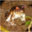

In [19]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/1.png')
cv2_imshow(img)

In [20]:
id_list = list(labels_df['id'])

In [21]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [22]:
#convert images to numpy arrya

train_data_folder = '/content/train/'

train_data = []

for id in id_list:
  img = Image.open(train_data_folder + str(id) + '.png')
  img = np.array(img)
  train_data.append(img)

#here, we reorganized the images to match the organized labels

In [23]:
type(train_data )

list

In [24]:
len(train_data)

50000

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
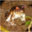

In [25]:
train_data[0]

In [26]:
type(train_data[0])

numpy.ndarray

In [27]:
#convert image list and label lis to numby array

X = np.array(train_data)
y = np.array(labels)

In [28]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
#scaling the data

x_train = x_train/255
x_test = x_test/255

In [31]:
x_train[0]

array([[[0.8745098 , 0.88627451, 0.89803922],
        [0.77647059, 0.79607843, 0.82352941],
        [0.76470588, 0.78431373, 0.81960784],
        ...,
        [0.72941176, 0.7372549 , 0.79607843],
        [0.72941176, 0.74117647, 0.79607843],
        [0.72156863, 0.74509804, 0.79215686]],

       [[0.81176471, 0.82745098, 0.83921569],
        [0.76862745, 0.78823529, 0.80784314],
        [0.74901961, 0.76862745, 0.79215686],
        ...,
        [0.70588235, 0.7254902 , 0.78039216],
        [0.70588235, 0.72156863, 0.77647059],
        [0.70588235, 0.71764706, 0.77254902]],

       [[0.84313725, 0.85882353, 0.86666667],
        [0.76862745, 0.77647059, 0.80392157],
        [0.76862745, 0.76862745, 0.8       ],
        ...,
        [0.71764706, 0.7254902 , 0.76862745],
        [0.71372549, 0.7254902 , 0.76862745],
        [0.71764706, 0.7254902 , 0.77647059]],

       ...,

       [[0.69411765, 0.68235294, 0.69019608],
        [0.46666667, 0.43921569, 0.43137255],
        [0.48627451, 0

**Building the Neural Network**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
number_of_classes = 10

#setting up the layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(number_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
#compile the neural network

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [35]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2598 - loss: 2.0382
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3492 - loss: 1.8226
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3658 - loss: 1.7628
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3811 - loss: 1.7351
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3889 - loss: 1.7069
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4003 - loss: 1.6803
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3971 - loss: 1.6797
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4081 - loss: 1.6616
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.4130 - loss: 1.6471
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4146 - loss: 1.6433


**Transfer Learning with ResNet50**

In [36]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [37]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [38]:
numeber_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(numeber_of_classes, activation='softmax'))

In [39]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [40]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 446s 348ms/step - acc: 0.3347 - loss: 2.0062 - val_acc: 0.7425 - val_loss: 1.0001
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 409s 346ms/step - acc: 0.6873 - loss: 1.0413 - val_acc: 0.8917 - val_loss: 0.4869
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 346ms/step - acc: 0.8168 - loss: 0.7280 - val_acc: 0.9180 - val_loss: 0.3623
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 346ms/step - acc: 0.8836 - loss: 0.5369 - val_acc: 0.9260 - val_loss: 0.3015
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 346ms/step - acc: 0.9177 - loss: 0.4180 - val_acc: 0.9255 - val_loss: 0.2923
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 345ms/step - acc: 0.9444 - loss: 0.3250 - val_acc: 0.9370 - val_loss: 0.2575
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 339ms/step - acc: 0.9601 - loss: 0.2621 - val_acc: 0.9337 - val_loss: 0.2444
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 381s 338ms/step - acc: 0.9707 - loss: 0.2153 - val_acc: 0.9293 - val_loss: 0.2454
Epoch 9/

In [41]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy :', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - acc: 0.9410 - loss: 0.2272
Test Accuracy : 0.9383999705314636


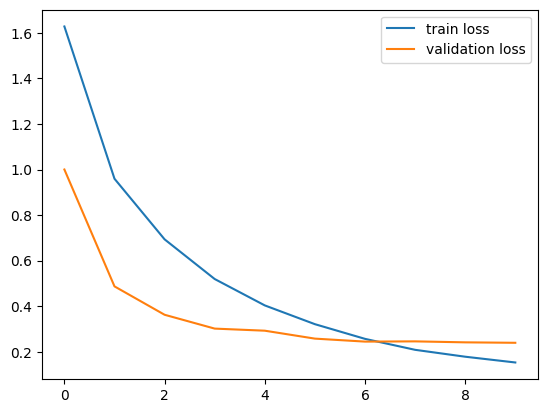

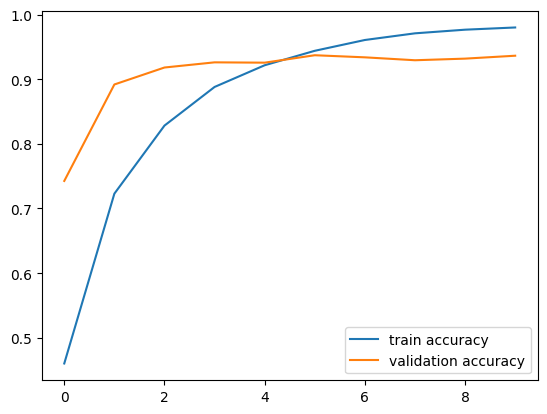

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()